In [1]:
#%matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ds = pd.read_csv("D:/Sensorprobe/version_3/new_data/screw_03.txt", sep='\t')
df = ds
df

,2,1.0,1.0.1,1.0.2,1.0.3,1.0.4,1.0.5,3,0.0005824315351730404,0.0004851330962649603,...,0.004658631769166659,0.004600918619411551,1,4.656612875245797e-06,4.656612875245797e-06.1,4.656612875245797e-06.2,4.656612875245797e-06.3,4.656612875245797e-06.4,4.656612875245797e-06.5,1691407117.079333
0,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000883,0.001629,...,0.001346,0.000254,1,0.001752,0.001813,0.000892,0.000560,0.000364,0.001787,1.691407e+09
1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000539,0.000276,...,0.003581,0.000434,1,0.001350,0.000368,0.000447,0.001639,0.000762,0.001464,1.691407e+09
2,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000405,0.000314,...,0.004496,0.001168,1,0.000490,0.000912,0.001278,0.000907,0.001002,0.000804,1.691407e+09
3,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000299,0.000506,...,0.005341,0.001038,1,0.001721,0.000595,0.000111,0.001015,0.000499,0.001124,1.691407e+09
4,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000684,0.000609,...,0.005587,0.000748,1,0.000545,0.000057,0.001382,0.011241,0.000337,0.000265,1.691407e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000496,0.001798,...,0.023119,0.052914,1,0.004030,0.005642,0.034585,0.007296,0.004293,0.015012,1.691407e+09
652,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000251,0.001141,...,0.027097,0.055546,1,0.004472,0.004308,0.034254,0.007297,0.005412,0.015430,1.691407e+09
653,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000425,0.000801,...,0.031272,0.058026,1,0.002565,0.005186,0.033883,0.005713,0.003382,0.011000,1.691407e+09
654,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.001008,0.002384,...,0.033798,0.056390,1,0.002059,0.004144,0.028777,0.007848,0.007874,0.012396,1.691407e+09


In [3]:
df.columns.values[-1] = "timestamp"  
df.rename(columns={'1':'Port1'}, inplace=True)
df.rename(columns={'2':'Port2'}, inplace=True)
df.rename(columns={'3':'Port3'}, inplace=True)
df.rename(columns={'4':'Port4'}, inplace=True)
df.columns

Index(['Port2', '1.0', '1.0.1', '1.0.2', '1.0.3', '1.0.4', '1.0.5', 'Port3',
       '0.0005824315351730404', '0.0004851330962649603',
       '0.0006552869104932469', '0.001262075538754806',
       '0.0018615286985364102', '0.0010370896443695158', 'Port4',
       '0.0029267681630842047', '0.0020614867277361495',
       '0.0034394305953860727', '0.0069829135089349865',
       '0.004658631769166659', '0.004600918619411551', 'Port1',
       '4.656612875245797e-06', '4.656612875245797e-06.1',
       '4.656612875245797e-06.2', '4.656612875245797e-06.3',
       '4.656612875245797e-06.4', '4.656612875245797e-06.5', 'timestamp'],
      dtype='object')

In [4]:
# rename all columns
port_mappings = {
    'Port1': {'prefix': 'R1_', 'range': 6},
    'Port2': {'prefix': 'R2_', 'range': 6},
    'Port3': {'prefix': 'R3_', 'range': 6},
    'Port4': {'prefix': 'R4_', 'range': 6}
}
print(port_mappings)
for port, mapping in port_mappings.items():
    start_column = port
    prefix = mapping['prefix']
    column_range = mapping['range']

    if start_column in df.columns:
        start_index = df.columns.get_loc(start_column)
        new_column_names = [prefix + str(i) for i in range(1, column_range + 1)]
        df = df.rename(columns=dict(zip(df.columns[start_index + 1:start_index + column_range + 1], new_column_names)))
    else:
        print(f"Error: column'{start_column}' not found")

df.columns


{'Port1': {'prefix': 'R1_', 'range': 6}, 'Port2': {'prefix': 'R2_', 'range': 6}, 'Port3': {'prefix': 'R3_', 'range': 6}, 'Port4': {'prefix': 'R4_', 'range': 6}}


Index(['Port2', 'R2_1', 'R2_2', 'R2_3', 'R2_4', 'R2_5', 'R2_6', 'Port3',
       'R3_1', 'R3_2', 'R3_3', 'R3_4', 'R3_5', 'R3_6', 'Port4', 'R4_1', 'R4_2',
       'R4_3', 'R4_4', 'R4_5', 'R4_6', 'Port1', 'R1_1', 'R1_2', 'R1_3', 'R1_4',
       'R1_5', 'R1_6', 'timestamp'],
      dtype='object')

In [5]:
df

,Port2,R2_1,R2_2,R2_3,R2_4,R2_5,R2_6,Port3,R3_1,R3_2,...,R4_5,R4_6,Port1,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,timestamp
0,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000883,0.001629,...,0.001346,0.000254,1,0.001752,0.001813,0.000892,0.000560,0.000364,0.001787,1.691407e+09
1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000539,0.000276,...,0.003581,0.000434,1,0.001350,0.000368,0.000447,0.001639,0.000762,0.001464,1.691407e+09
2,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000405,0.000314,...,0.004496,0.001168,1,0.000490,0.000912,0.001278,0.000907,0.001002,0.000804,1.691407e+09
3,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000299,0.000506,...,0.005341,0.001038,1,0.001721,0.000595,0.000111,0.001015,0.000499,0.001124,1.691407e+09
4,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000684,0.000609,...,0.005587,0.000748,1,0.000545,0.000057,0.001382,0.011241,0.000337,0.000265,1.691407e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000496,0.001798,...,0.023119,0.052914,1,0.004030,0.005642,0.034585,0.007296,0.004293,0.015012,1.691407e+09
652,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000251,0.001141,...,0.027097,0.055546,1,0.004472,0.004308,0.034254,0.007297,0.005412,0.015430,1.691407e+09
653,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.000425,0.000801,...,0.031272,0.058026,1,0.002565,0.005186,0.033883,0.005713,0.003382,0.011000,1.691407e+09
654,2,1.0,1.0,1.0,1.0,1.0,1.0,3,0.001008,0.002384,...,0.033798,0.056390,1,0.002059,0.004144,0.028777,0.007848,0.007874,0.012396,1.691407e+09


In [6]:
# df.dtypes

In [7]:
# def reciprocal(d):
#     # drop timestamp and identify numeric columns
#     ds=d.drop(['timestamp',"b'Port","b'Port.1","b'Port.2", "b'Port.3",'Port1','Port2', 'Port3', 'Port4'], axis=1)
#     numeric_columns = ds.select_dtypes(include=[np.number]).columns
#     ds[numeric_columns] = ds[numeric_columns].apply(lambda x: 1 / x)
#     return ds

# dd = reciprocal(df)
# dd

In [8]:
df.to_csv('D:/Sensorprobe/version_3/new_data/screw_01.csv', index=False)


In [9]:
df = pd.read_csv('D:/Sensorprobe/version_3/new_data/screw_01.csv')

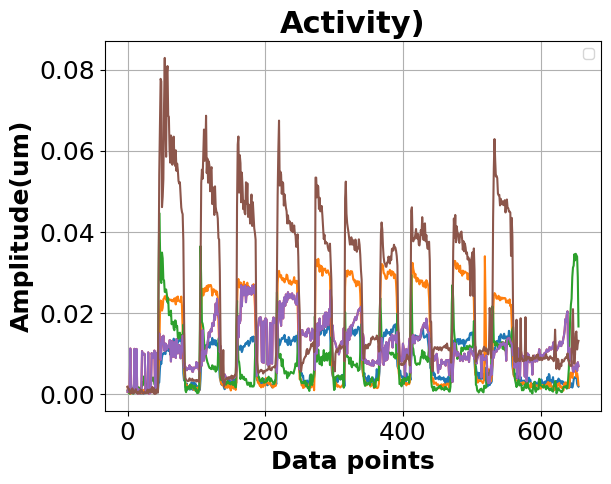

In [14]:

plt.title('Activity)', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)
plt.legend(['R1_1'])

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(df.index, df[['R1_1', 'R1_2','R1_3','R1_4','R1_4','R1_6']])


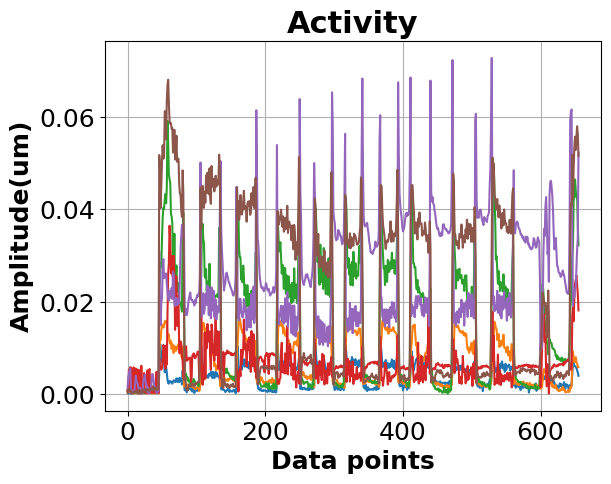

In [13]:
plt.title('Activity', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(df.index, df[['R4_1', 'R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6']])


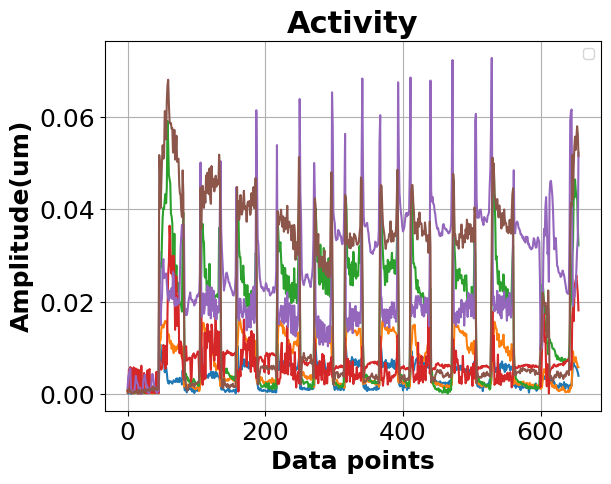

In [16]:
plt.legend(['R4_1', 'R4_3', 'R4_5', 'R4_7', 'R4_9', 'R4_11'])
plt.title('Activity', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(df.index, df[['R4_1', 'R4_2', 'R4_3', 'R4_4', 'R4_5','R4_6']])
